# Assignment - Deep Neural Network - Classification - McCartney

In this assignment, we will focus transportation mode detection. It contains data about smarthphone sensors as people are using different modes of transportation. Each row represents a specific mode of transportation and the corresponding readings in the smartphone sensors (for that mode of transportation). This is a multiclass classification task: predict whether the mode of transportation based on a smartphone's sensor readings. Transportation mode prediction can provide context information to enhance applications and provide a better user experience. It can be crucial for many different applications, such as device profiling, monitoring road and traffic conditions, healthcare, travel support etc.

## Description of Variables

The description of variables are provided in "Transportation - Data Dictionary.docx"

## Goal

Use the **transportation.csv** data set and build a model to predict **target**. Build at least **three neural network models**.

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.


# Read and Prepare the Data
## Also, perform feature engineering: create one new variable from existing ones

In [1]:
# Common imports
import numpy as np
import pandas as pd

np.random.seed(42)

In [2]:
transportation = pd.read_csv("transportation.csv")
transportation.head()

,androidsensoraccelerometermean,androidsensoraccelerometermin,androidsensoraccelerometermax,androidsensoraccelerometerstd,androidsensorgyroscopemean,androidsensorgyroscopemin,androidsensorgyroscopemax,androidsensorgyroscopestd,soundmean,soundmin,soundmax,soundstd,target
0,9.701276,9.520186,9.826383,0.074273,0.021729,0.012970,0.033699,0.005727,88.111708,88.111708,88.111708,0.000000,Train
1,9.240731,6.927889,11.371441,1.157460,0.114340,0.018950,0.291155,0.071189,89.771860,89.771860,89.771860,0.008778,Bus
2,10.397750,8.649993,11.105722,0.614978,0.301824,0.260226,0.339794,0.021420,89.797764,89.797764,89.797764,0.039875,Car
3,10.197564,9.977808,10.417198,0.137675,0.017742,0.003502,0.039349,0.009800,89.746162,89.746162,89.746162,0.122969,Train
4,9.812239,8.290205,11.913782,1.016052,0.109497,0.005390,0.277880,0.070489,89.768758,89.768758,89.768758,1.023191,Bus


In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(transportation, test_size=0.3)

In [4]:
train_set.isna().sum()

androidsensoraccelerometermean    0
androidsensoraccelerometermin     0
androidsensoraccelerometermax     0
androidsensoraccelerometerstd     0
androidsensorgyroscopemean        0
androidsensorgyroscopemin         0
androidsensorgyroscopemax         0
androidsensorgyroscopestd         0
soundmean                         0
soundmin                          0
soundmax                          0
soundstd                          0
target                            0
dtype: int64

In [5]:
test_set.isna().sum()

androidsensoraccelerometermean    0
androidsensoraccelerometermin     0
androidsensoraccelerometermax     0
androidsensoraccelerometerstd     0
androidsensorgyroscopemean        0
androidsensorgyroscopemin         0
androidsensorgyroscopemax         0
androidsensorgyroscopestd         0
soundmean                         0
soundmin                          0
soundmax                          0
soundstd                          0
target                            0
dtype: int64

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer

In [7]:
# We can't use the following columns in this tutorial, because they are not for binary classification tasks

train = train_set.drop([], axis=1)
test = test_set.drop([], axis=1)

In [8]:
train_target = train[['target']]
test_target = test[['target']]

train_inputs = train.drop(['target'], axis=1)
test_inputs = test.drop(['target'], axis=1)

### Feature Engineering

In [10]:
train_inputs['androidsensorgyroscopemean'].value_counts()

0.000000    444
0.003665     15
0.001728     10
0.061094      5
0.020480      4
           ... 
1.519574      1
0.006355      1
0.023980      1
1.935844      1
0.996766      1
Name: androidsensorgyroscopemean, Length: 2999, dtype: int64

<AxesSubplot:>

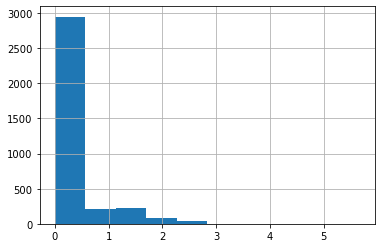

In [11]:
train_inputs['androidsensorgyroscopemean'].hist()

In [12]:
# Import power transformer from sklearn. It will help us create a "normal distribution"
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer(method = 'yeo-johnson', standardize=True)

In [13]:
transformed_androidsensorgyroscopemean = PT.fit_transform(train_inputs[['androidsensorgyroscopemean']])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

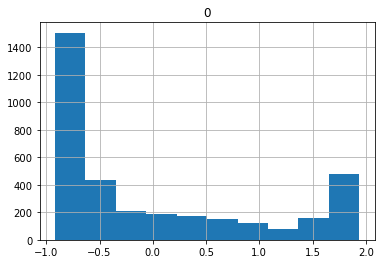

In [14]:
pd.DataFrame(transformed_androidsensorgyroscopemean).hist()

In [15]:
train_inputs.dtypes

androidsensoraccelerometermean    float64
androidsensoraccelerometermin     float64
androidsensoraccelerometermax     float64
androidsensoraccelerometerstd     float64
androidsensorgyroscopemean        float64
androidsensorgyroscopemin         float64
androidsensorgyroscopemax         float64
androidsensorgyroscopestd         float64
soundmean                         float64
soundmin                          float64
soundmax                          float64
soundstd                          float64
dtype: object

In [16]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

In [17]:
numeric_columns

['androidsensoraccelerometermean',
 'androidsensoraccelerometermin',
 'androidsensoraccelerometermax',
 'androidsensoraccelerometerstd',
 'androidsensorgyroscopemean',
 'androidsensorgyroscopemin',
 'androidsensorgyroscopemax',
 'androidsensorgyroscopestd',
 'soundmean',
 'soundmin',
 'soundmax',
 'soundstd']

In [18]:
transformed_columns = ['androidsensorgyroscopemean']

### Pipeline

In [19]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [20]:
my_new_column = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('powertransformer', PowerTransformer(method = 'yeo-johnson', standardize=True))])

In [21]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        #('cat', categorical_transformer, categorical_columns),
        #('binary', binary_transformer, binary_columns),
        ('trans', my_new_column, transformed_columns)],
        remainder='passthrough')

#passtrough is an optional step. You don't have to use it.

### Transform

In [22]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-1.74886686e-01,  2.77326456e-03, -5.99315610e-02, ...,
         5.25446848e-01,  6.62693768e-01,  1.53390828e+00],
       [ 5.30439796e+00, -3.81970427e+00,  9.68226289e+00, ...,
        -2.02531331e+00, -4.59510230e-01,  1.92811414e+00],
       [-6.89177749e-01,  5.48634204e-01, -4.96676441e-01, ...,
         7.45506062e-01, -4.51528627e-01, -6.72794013e-01],
       ...,
       [-4.34786689e-01,  6.01754279e-01, -4.54446532e-01, ...,
         2.65893332e-01,  3.06596409e-01, -8.26400265e-01],
       [ 4.54454105e-01, -2.35371258e+00,  2.48388209e+00, ...,
         7.48723847e-01, -3.77548557e-01,  1.91778552e+00],
       [-1.96270300e-01,  4.93180855e-01, -3.99497977e-01, ...,
         7.48741421e-01, -1.15978071e-01, -5.32378012e-01]])

In [23]:
train_x.shape

(3500, 13)

In [24]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[-0.32025512,  0.76100101, -0.4612405 , ..., -0.05407139,
        -0.45951023, -0.8626876 ],
       [-0.3753657 , -0.16063805, -0.20714456, ...,  0.50047109,
        -0.37680808, -0.00233947],
       [-1.01943413,  0.46313497, -0.5521988 , ..., -0.01864124,
        -0.45951023, -0.72854034],
       ...,
       [ 0.00412727,  0.87321484, -0.41794116, ...,  0.11887343,
         0.10361519, -0.91904612],
       [ 0.09581334,  0.91294408, -0.41518271, ...,  0.5263533 ,
        -0.41269376, -0.8288752 ],
       [-0.3038126 ,  0.70052755, -0.44874281, ..., -2.02531331,
        -0.45951023, -0.72460851]])

In [25]:
test_x.shape

(1500, 13)

In [26]:
train_target

,target
1840,Train
2115,Walking
4437,Train
1146,Train
2486,Walking
...,...
4426,Bus
466,Bus
3092,Train
3772,Walking


## Keras needs Ordinal target values for classification

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

train_y = ord_enc.fit_transform(train_target)

train_y

array([[3.],
       [4.],
       [3.],
       ...,
       [3.],
       [4.],
       [0.]])

In [28]:
test_y = ord_enc.transform(test_target)

test_y

array([[3.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [29]:
ord_enc.categories_

[array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)]

## Baseline

In [30]:
train_target.value_counts()/len(train_target)

target 
Still      0.204286
Train      0.201429
Car        0.201143
Walking    0.197714
Bus        0.195429
dtype: float64

# Keras DNN model 1 - Multiclass

In [31]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
train_x.shape

(3500, 13)

In [37]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=13)) #match nerons with column count or train shape (train_x.shape[1])
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

#final layer: there has to be 5 nodes with softmax (because we have 5 categories)
model.add(keras.layers.Dense(5, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 505       
Total params: 22,105
Trainable params: 22,105
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [40]:
# Fit the model

history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=20, batch_size=500)

Epoch 1/20
7/7 [==============================] - 0s 17ms/step - loss: 1.2342 - accuracy: 0.4917 - val_loss: 1.0850 - val_accuracy: 0.5867
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 1.0000 - accuracy: 0.6169 - val_loss: 0.9372 - val_accuracy: 0.6173
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.9266 - accuracy: 0.6271 - val_loss: 0.9177 - val_accuracy: 0.6347
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.6646 - val_loss: 0.8469 - val_accuracy: 0.6667
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8148 - accuracy: 0.6809 - val_loss: 0.8108 - val_accuracy: 0.6753
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7890 - accuracy: 0.6860 - val_loss: 0.7764 - val_accuracy: 0.6873
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7517 - accuracy: 0.7031 - val_loss: 0.7718 - val_accuracy: 0.6920
Epoch 8/20
7/7 [=================

In [41]:
# evaluate the model

scores = model.evaluate(test_x, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.6481308937072754, 0.7480000257492065]

In [42]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.65
accuracy: 74.80%


# Keras DNN model 2

In [47]:
# Make sure to try deep networks
model = keras.models.Sequential()


inputlayer = keras.layers.Input(shape=13) #match nerons with column count or train shape (train_x.shape[1])

hidden1 = keras.layers.Dense(100, activation='relu')(inputlayer)
hidden2 = keras.layers.Dense(100, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(100, activation='relu')(hidden2)

concat = keras.layers.Concatenate()([inputlayer, hidden3])

#final layer: there has to be 5 nodes with softmax (because we have 5 categories)
output = keras.layers.Dense(5, activation='softmax')(concat)

model = keras.Model(inputs =[inputlayer], outputs = output)


In [48]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [49]:
# Fit the model

history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=20, batch_size=500)

Epoch 1/20
7/7 [==============================] - 0s 13ms/step - loss: 1.3590 - accuracy: 0.4337 - val_loss: 1.1353 - val_accuracy: 0.5727
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 1.0513 - accuracy: 0.6029 - val_loss: 0.9937 - val_accuracy: 0.6007
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.9446 - accuracy: 0.6311 - val_loss: 0.9300 - val_accuracy: 0.6387
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.8924 - accuracy: 0.6497 - val_loss: 0.8876 - val_accuracy: 0.6507
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8428 - accuracy: 0.6720 - val_loss: 0.8427 - val_accuracy: 0.6733
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8141 - accuracy: 0.6843 - val_loss: 0.8182 - val_accuracy: 0.6813
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.6906 - val_loss: 0.8024 - val_accuracy: 0.6913
Epoch 8/20
7/7 [=================

In [50]:
# evaluate the model

scores = model.evaluate(test_x, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.6314022541046143, 0.768666684627533]

In [51]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.63
accuracy: 76.87%


# MLPClassifier (one model for comparison purposes)

In [57]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

mlp_clf.fit(train_x, train_y)

C:\Users\erich\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.37373874
Iteration 2, loss = 1.23820056
Iteration 3, loss = 1.17031172
Iteration 4, loss = 1.12627124
Iteration 5, loss = 1.09228534
Iteration 6, loss = 1.06552421
Iteration 7, loss = 1.04370294
Iteration 8, loss = 1.02496663
Iteration 9, loss = 1.00916813
Iteration 10, loss = 0.99525808
Iteration 11, loss = 0.98351522
Iteration 12, loss = 0.97433391
Iteration 13, loss = 0.96552064
Iteration 14, loss = 0.95699828
Iteration 15, loss = 0.94941183
Iteration 16, loss = 0.94293725
Iteration 17, loss = 0.93624894
Iteration 18, loss = 0.92991083
Iteration 19, loss = 0.92435068
Iteration 20, loss = 0.91884767
Iteration 21, loss = 0.91342290
Iteration 22, loss = 0.90820518
Iteration 23, loss = 0.90384490
Iteration 24, loss = 0.89959296
Iteration 25, loss = 0.89579935
Iteration 26, loss = 0.89056897
Iteration 27, loss = 0.88653972
Iteration 28, loss = 0.88244857
Iteration 29, loss = 0.87914125
Iteration 30, loss = 0.87528791
Iteration 31, loss = 0.87210418
Iteration 32, los

Iteration 261, loss = 0.59797289
Iteration 262, loss = 0.59645970
Iteration 263, loss = 0.59791084
Iteration 264, loss = 0.59656184
Iteration 265, loss = 0.59777444
Iteration 266, loss = 0.59686535
Iteration 267, loss = 0.59535157
Iteration 268, loss = 0.59515631
Iteration 269, loss = 0.59472573
Iteration 270, loss = 0.59479699
Iteration 271, loss = 0.59291856
Iteration 272, loss = 0.59396897
Iteration 273, loss = 0.59332026
Iteration 274, loss = 0.59350217
Iteration 275, loss = 0.59310316
Iteration 276, loss = 0.59109110
Iteration 277, loss = 0.59171652
Iteration 278, loss = 0.59340597
Iteration 279, loss = 0.59077551
Iteration 280, loss = 0.58992589
Iteration 281, loss = 0.58893733
Iteration 282, loss = 0.58833808
Iteration 283, loss = 0.58944045
Iteration 284, loss = 0.58867946
Iteration 285, loss = 0.58737141
Iteration 286, loss = 0.58767523
Iteration 287, loss = 0.58800308
Iteration 288, loss = 0.58713629
Iteration 289, loss = 0.58913989
Iteration 290, loss = 0.58658189
Iteration 

Iteration 510, loss = 0.51533718
Iteration 511, loss = 0.51524349
Iteration 512, loss = 0.51400482
Iteration 513, loss = 0.51419020
Iteration 514, loss = 0.51491527
Iteration 515, loss = 0.51382689
Iteration 516, loss = 0.51425399
Iteration 517, loss = 0.51397224
Iteration 518, loss = 0.51158491
Iteration 519, loss = 0.51191520
Iteration 520, loss = 0.51186726
Iteration 521, loss = 0.51105156
Iteration 522, loss = 0.51206037
Iteration 523, loss = 0.51077859
Iteration 524, loss = 0.51112819
Iteration 525, loss = 0.51061521
Iteration 526, loss = 0.51080622
Iteration 527, loss = 0.51182857
Iteration 528, loss = 0.51007794
Iteration 529, loss = 0.51023523
Iteration 530, loss = 0.51194940
Iteration 531, loss = 0.51074467
Iteration 532, loss = 0.51041050
Iteration 533, loss = 0.50893542
Iteration 534, loss = 0.50790558
Iteration 535, loss = 0.50998908
Iteration 536, loss = 0.50822891
Iteration 537, loss = 0.50893949
Iteration 538, loss = 0.50828176
Iteration 539, loss = 0.50950781
Iteration 

Iteration 773, loss = 0.46153280
Iteration 774, loss = 0.46332252
Iteration 775, loss = 0.46156660
Iteration 776, loss = 0.46532527
Iteration 777, loss = 0.46379510
Iteration 778, loss = 0.46269510
Iteration 779, loss = 0.46138189
Iteration 780, loss = 0.46165186
Iteration 781, loss = 0.46288264
Iteration 782, loss = 0.46080851
Iteration 783, loss = 0.46133508
Iteration 784, loss = 0.46079408
Iteration 785, loss = 0.46398165
Iteration 786, loss = 0.46539054
Iteration 787, loss = 0.45922500
Iteration 788, loss = 0.46095617
Iteration 789, loss = 0.45993086
Iteration 790, loss = 0.46111527
Iteration 791, loss = 0.46040869
Iteration 792, loss = 0.45912827
Iteration 793, loss = 0.45898047
Iteration 794, loss = 0.45958616
Iteration 795, loss = 0.46039063
Iteration 796, loss = 0.46104702
Iteration 797, loss = 0.45996814
Iteration 798, loss = 0.45935176
Iteration 799, loss = 0.45839257
Iteration 800, loss = 0.45866654
Iteration 801, loss = 0.45862812
Iteration 802, loss = 0.45910565
Iteration 

C:\Users\erich\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, verbose=True)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
#Predict the train values
train_y_pred = mlp_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8397142857142857

In [60]:
#Predict the test values
test_y_pred = mlp_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.7726666666666666

# Discussion

Briefly answer the following questions: (2 points) 
1) Which model performs the best (and why)?<br>
2) What is the baseline value? <br>
3) Does the best model perform better than the baseline (and why)?<br>
4) Does the best model exhibit any overfitting; what did you do about it?

1- MLP perfomred best with 77.3% accuarcy <br>
2- 20% accuarcy<br>
3- Yes, MLP was 77.3% accuarte and baseline was 20%<br>
4- No overfitting observed.